# Аналіз пратаколаў прэзідэнцкіх выбараў у Беларусі 2020

Дзякуючы сумеснай працы платформаў «Сумленныя людзі», «Зубр» і «[Голас](https://belarus2020.org/home)» удалося атрымаць і апрацаваць выніковыя пратаколы **1310** выбарчых участкаў з **5767** па ўсёй Беларусі. На падставе гэтых пратаколаў і ладзіўся гэты аналіз.

> **Апрацаваныя дадзеныя і фатаграфіі пратаколаў [па спасылцы](https://drive.google.com/file/d/1tMYku50vb6jBawXXrj2SRRHlRi_OA_vy/view)**

## Дисклеймер 
Этот анализ не попытка доказать или обнаружить фальсификации на выборах 2020 в Беларуси. Для этого есть куда более явные и явные и убедительные свидетельства:

1. Аудио, как [глава района заставлял учителей](https://web.archive.org/web/20210211234117/https://news.tut.by/society/696465.html) изменить протокол после выборов
2. Люди в штатском [убеждают вывесить](https://www.youtube.com/watch?v=53n8WemV0tM) "правильный" протокол
3. [Отчет от платформы «Голос»](https://golos.partizan-results.com/election), который доказывает фальсификации на 30% избирательных участков. Беларусы прислали фотографии своих бюллетеней за Светлану Тихановскую больше чем, чем учтено в протоколах УИК.

** К тому же эти 1310 протоколов могут быть сфальсифицированными: есть свидетельства того, что на некоторых участках для граждан вывешивали один протокол, давали его сфотографировать гражданам, а в вышестоящую комиссию "ехал" уже совсем другой протокол, с "правильными" цифрами.

Поэтому этот анализ, не попытка показать фальсификации – это доказтельств не требует – а графическое представление масштаба этих фальсификаций на президентских выборах в Беларуси в 2020 году.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
elections = pd.read_excel('elections_EN.xlsx')

In [7]:
# выберем значимые данные
columns = ['Region', 'City', 'Address', 'Total number of voters',
           'Number of voters who took part in the vote', 'Number of voters who took part in early voting', 
           'Dmitriev', 'Konopackaya', 'Lukashenko', 'Tsikhanouskaya', 'Cherechen']

rename_dict = {
            "Total number of voters": "all_voters",
            "Number of voters who took part in the vote": "voted",
            "Number of voters who took part in early voting": "early_voters"}

votes = pd.DataFrame(elections[columns])
votes.rename(inplace=True, columns=rename_dict)
votes.head()

,Region,City,Address,all_voters,voted,early_voters,Dmitriev,Konopackaya,Lukashenko,Tsikhanouskaya,Cherechen
0,Брестская,Брест,"ул. Гоголя, 7, УО «Брестский государственный м...",1656.0,1319,252.0,21.0,16,464,701,16.0
1,Брестская,Брест,"ул. Героев обороны Брестской крепости, 78, УО ...",2646.0,2249,707.0,43.0,25,994,948,32.0
2,Брестская,Брест,"ул. Пригородная, 25, УО «Брестское государстве...",1805.0,1714,537.0,32.0,26,1125,395,24.0
3,Брестская,Брест,"ул. Смирнова, 21, общежитие ОАО «Брестский мяс...",2270.0,2122,863.0,42.0,21,1506,412,50.0
4,Брестская,Брест,"ул. Смирнова, 63, ГУО «Средняя школа № 5 г. Бр...",2746.0,2383,507.0,53.0,28,923,1157,48.0


In [8]:
# вычислим некоторые информативные данные
votes["appearance"] = round(votes["voted"] / votes['all_voters'], 5) # явка
votes["svetlana_%"] = round(votes["Tsikhanouskaya"] / votes['voted'], 5) # процент голосов за Светлану
votes["luka_%"] = round(votes["Lukashenko"] / votes['voted'], 5) # процент голосов за луку
votes["early_voters_%"] = round(votes["early_voters"] / votes['all_voters'], 5) # процент проголосовавших на досрочке

### Каждая точка – это УИК. Цвет определяет кандидата

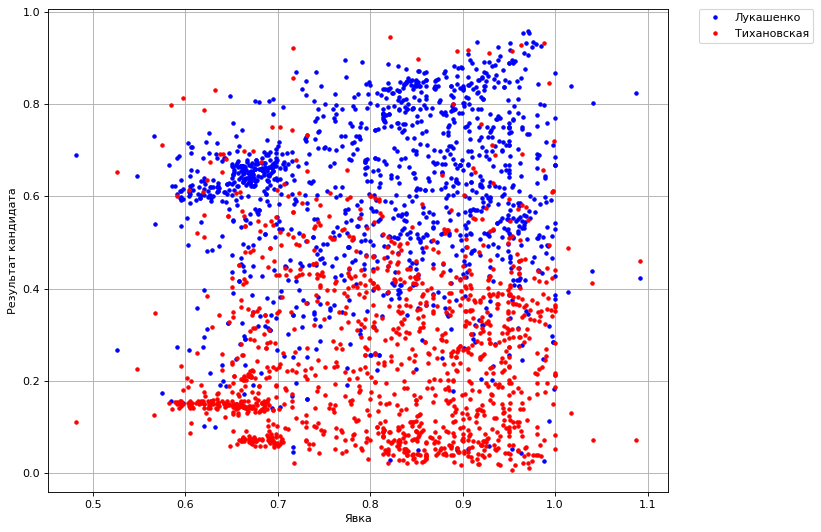

In [11]:
draw_dots(votes)

### Такой ☝️ разброс значений свидетельствует о сумбурных, бессистемных фальсификаций. 
Так как один `участок` (~2000 избирателей) уже сам по себе является `хорошей моделью выборов`:
1. в Беларуси большой процент урбанизации, нет ярковыраженных сельских регионов
2. нет сильного имущественного\финансовго расслоения общества
3. среди ~2000 избирателей будут и рабочий, и учитель, и ИП, и продавец, и директор – все социальные группы
4. исключением могут быть участки в воинских частях и т.п.

Следовательно, участки, в теории, `НЕ должны` существенно отличаться в своих предпочтениях (`голоса за кандидатов`) и `явке`.

**Подтверждение:** на картинке ниже ситуация на выборах президента России в 96ом году. Каждая точка – это УИК. 
Здесь и явка (по всем участкам в Москве) примерно одинаковая и распределение голосов (4 ярковыраженных кластера на графике справа) почти совпадает на всех участках

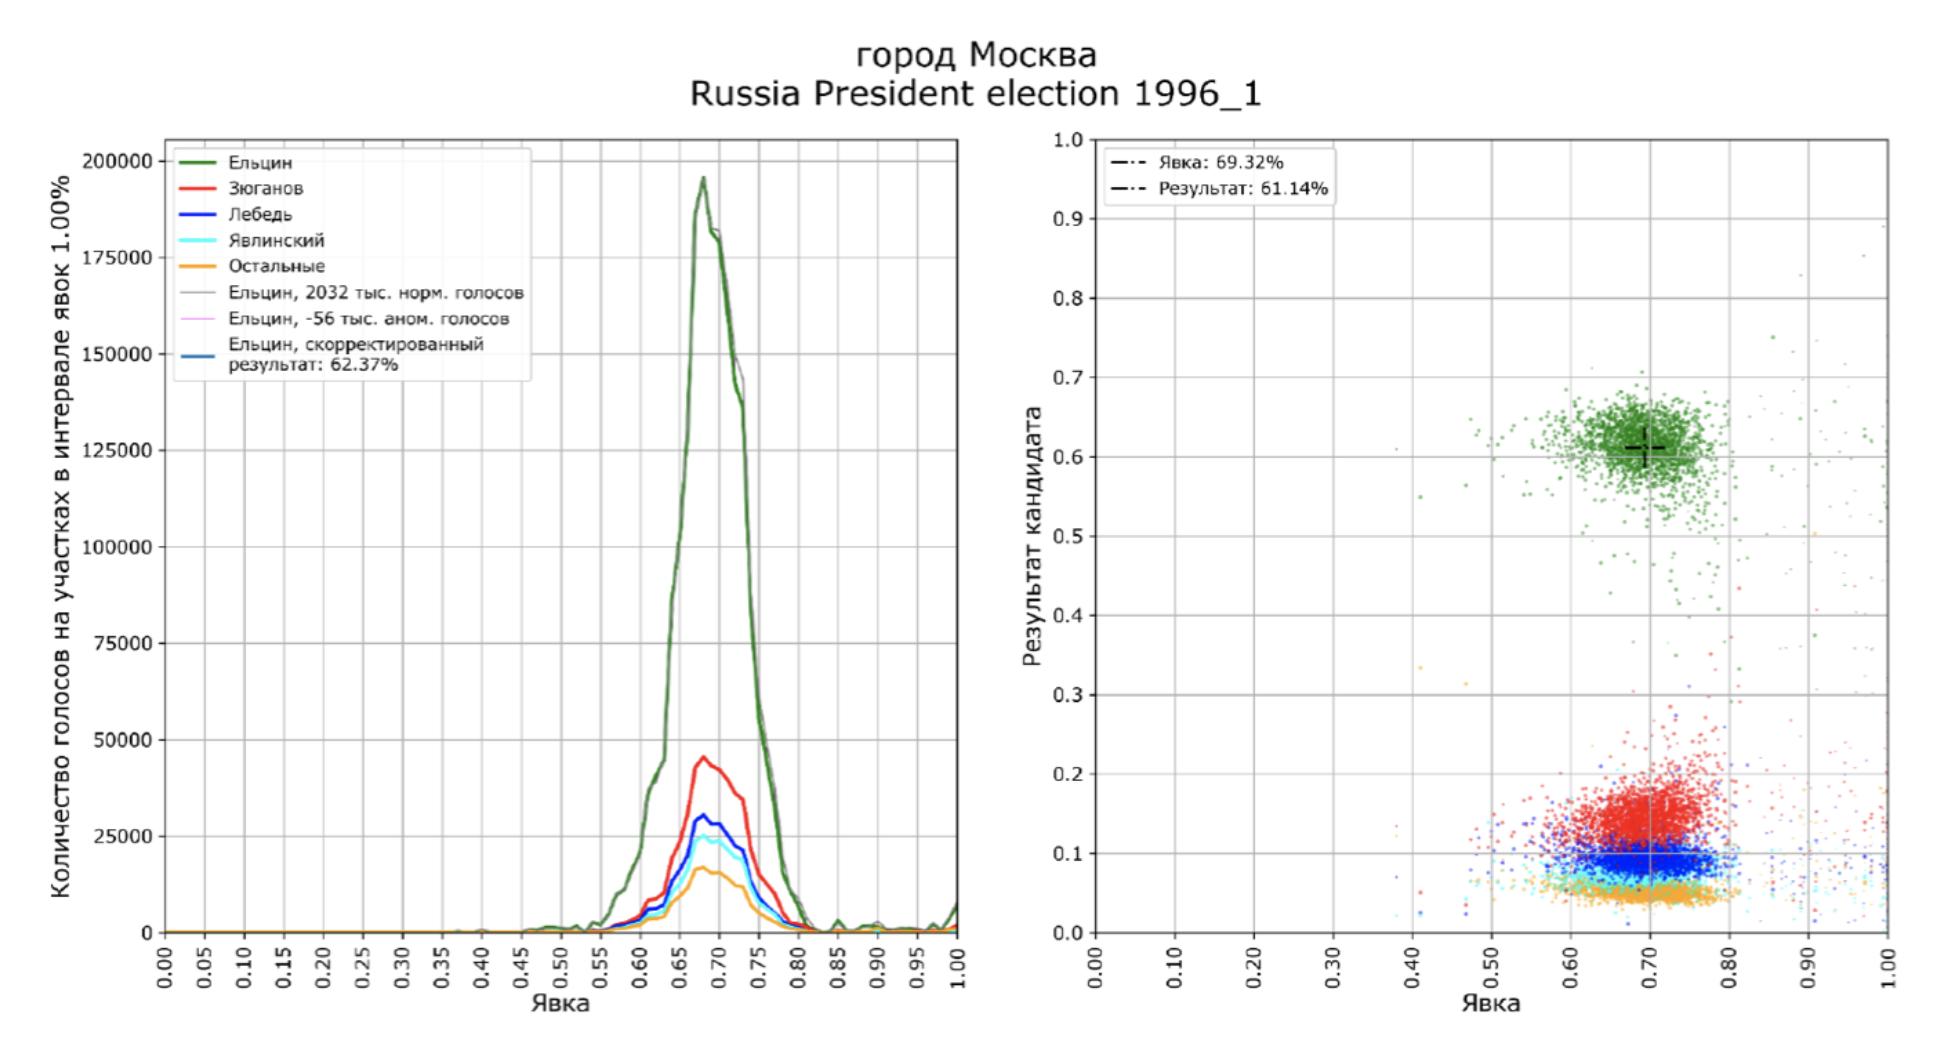

### Забавная разница в поведении избирателей в областных центрах

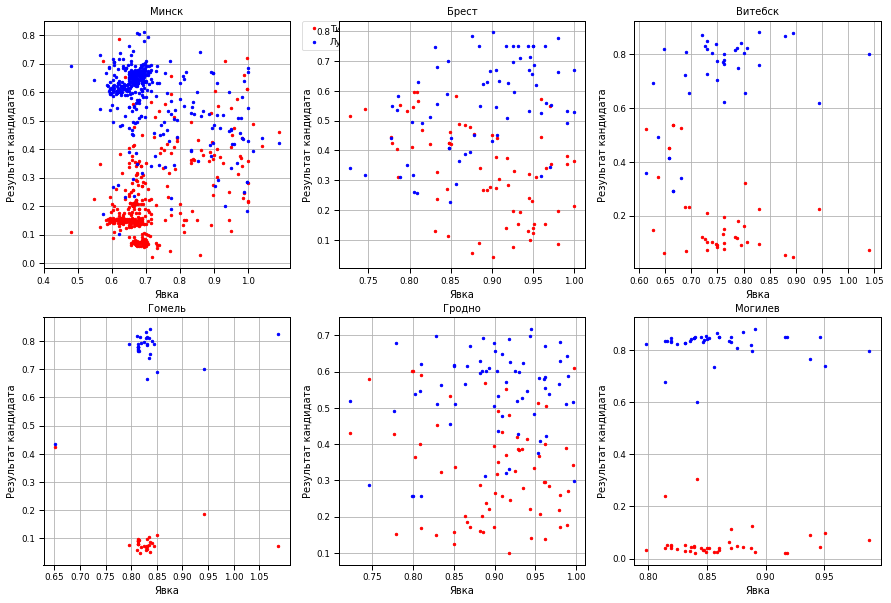

In [24]:
minsk_city = votes[votes['City'] == 'Минск']
brest_city = votes[votes['City'] == 'Брест']
vitebsk_city = votes[votes['City'] == 'Витебск']
gomel_city = votes[votes['City'] == 'Гомель']
grodno_city = votes[votes['City'] == 'Гродно']
mogilev_city = votes[votes['City'] == 'Могилев']

city_data = [minsk_city, brest_city, vitebsk_city, gomel_city, grodno_city, mogilev_city]
labels = ['Минск', 'Брест', 'Витебск', 'Гомель', 'Гродно', 'Могилев']

draw_regions(city_data, labels)

### В Могилеве явка строго больше 80%🥸

### В областях (без учета областных центров) отличия не такие заметные

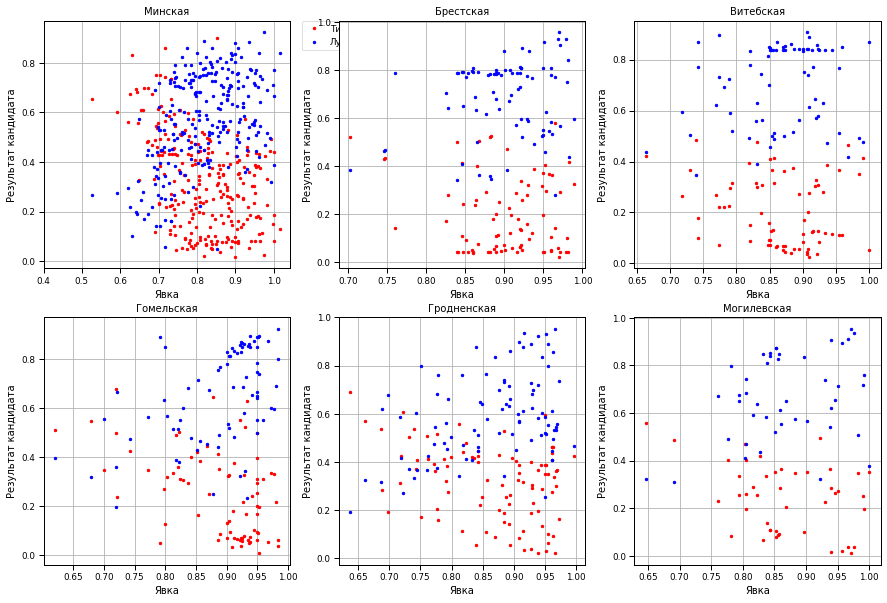

In [23]:
regions_data = [votes[(votes['City'] != 'Минск') & (votes['Region'] == 'Минская')],
             votes[(votes['City'] != 'Брест') & (votes['Region'] == 'Брестская')],
             votes[(votes['City'] != 'Витебск') & (votes['Region'] == 'Витебская')],
             votes[(votes['City'] != 'Гомель') & (votes['Region'] == 'Гомельская')],
             votes[(votes['City'] != 'Гродно') & (votes['Region'] == 'Гродненская')],
             votes[(votes['City'] != 'Могилев') & (votes['Region'] == 'Могилевская')]]

labels = ['Минская', 'Брестская', 'Витебская', 'Гомельская', 'Гродненская', 'Могилевская']

draw_regions(regions_data, labels)

### ❗️Но на этих графиках ☝️ просматривается фальсификационная схема «вброс за одного кандидата»

<img src="https://imgur.com/n0Mq4PA.jpg" style="width: 500px;"/>

### То есть когда фальсификаторы просто вбрасывают в урну бюллетени за одного кандидата, то явка растет, а результаты остальных кандидатов ползут вниз 💁

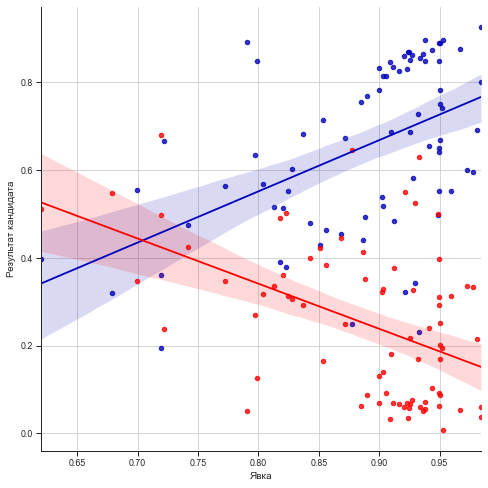

In [34]:
gomelskaya = votes[(votes['City'] != 'Гомель') & (votes['Region'] == 'Гомельская')]
draw_regression_plot(gomelskaya)

### Примерно такая же картинка во всех областях:

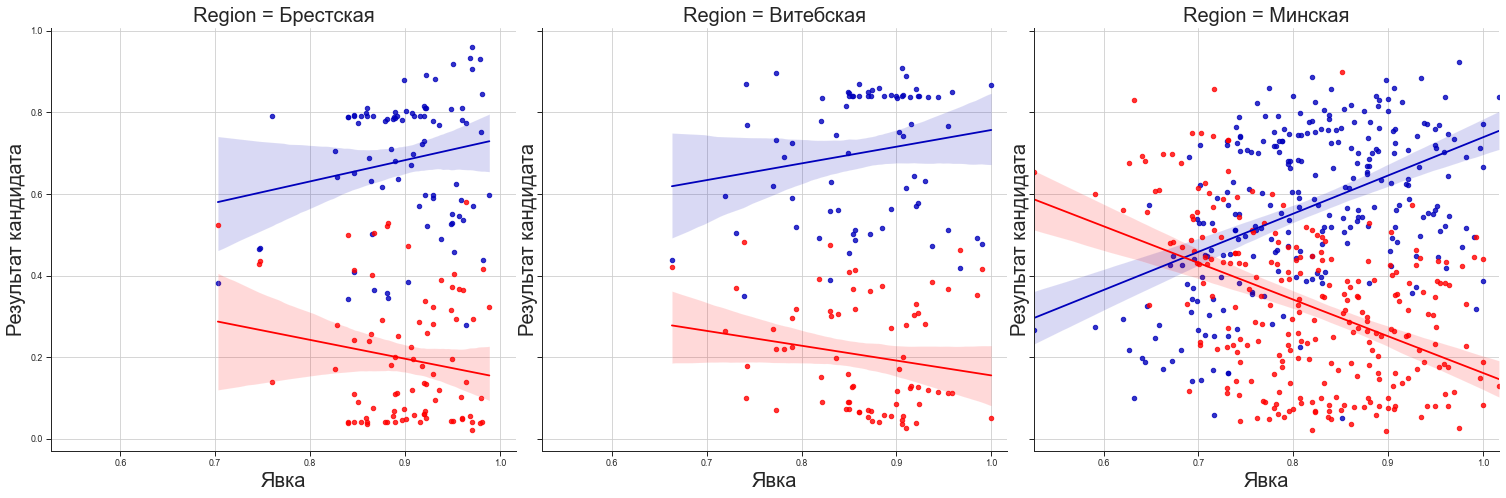

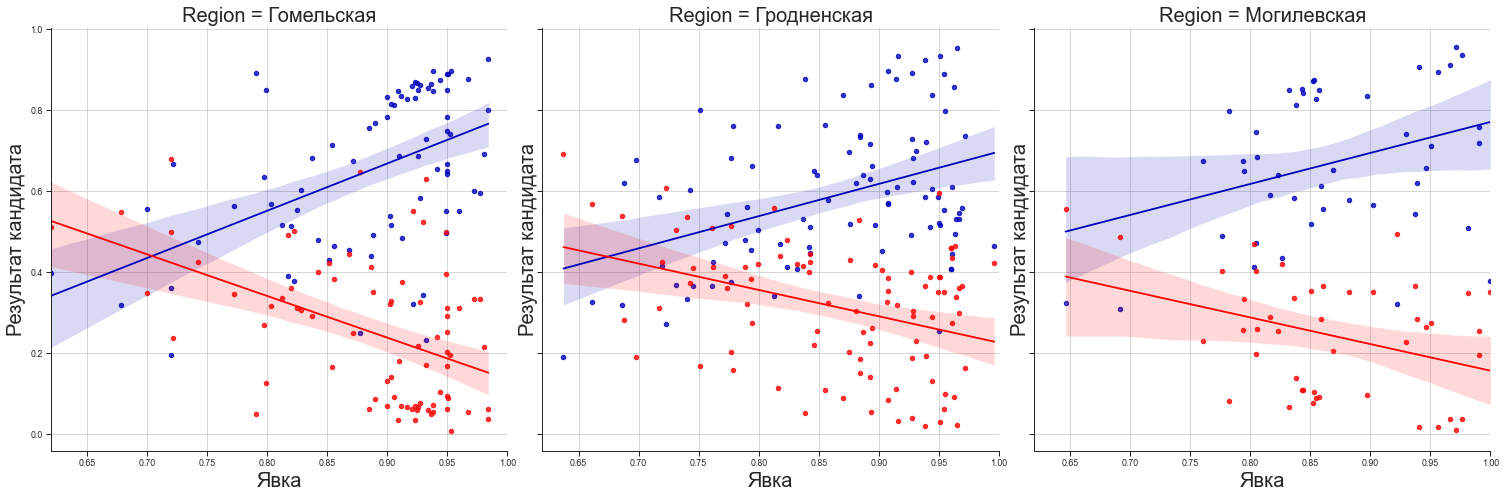

In [33]:
draw_regressions_plots(votes)

### Для сравнения на всех участках вне беларуси (кроме СПБ, Москвы и Стамбула) победила Светлана и там вот такая картинка:

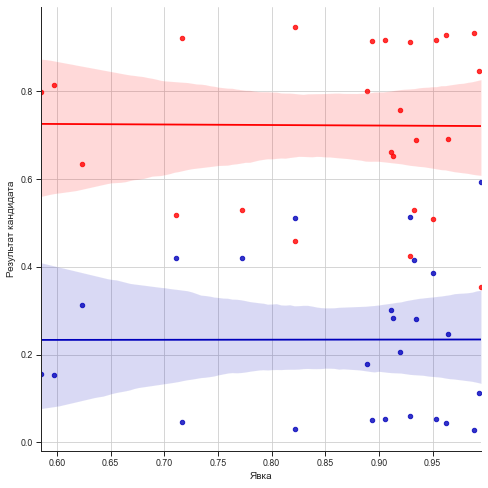

In [32]:
international_df = votes[(votes['Region'] == 'Минск') & (votes['City'] != 'Минск')]
draw_regression_plot(international_df)

### На участках в посольствах результат кандидата (%) не зависит от явки 🦸‍♀️

In [78]:
# участки вне Беларуси (в посольствах по всему миру)
international_df[['City', 'Tsikhanouskaya', 'Lukashenko',
                  'svetlana_%', 'luka_%']].sort_values('svetlana_%', ascending=False).head(7)

,City,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1023,"Вашингтон, США",419,13,0.94582,0.02935
1024,"Нью-Йорк, США",959,28,0.93288,0.02724
1018,"Гаага, Нидерланды",385,18,0.92771,0.04337
1028,"Прага, Чехия",447,22,0.92165,0.04536
1011,"Мюнхен, Германия",786,45,0.91715,0.05251
1012,"Тель-Авив, Израиль",447,26,0.91598,0.05328
1010,"Берлин, Германия",1036,57,0.91439,0.05031


### Вне Беларуси лука  "победил" только в трех городах: Москва, Санкт-Петербург, Стамбул

In [48]:
international_df[['City', 'Tsikhanouskaya', 'Lukashenko',
                  'svetlana_%', 'luka_%']][international_df['svetlana_%'] < international_df['luka_%']]

,City,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1020,"Москва, Россия",1663,2018,0.42380,0.51427
1021,"Санкт-Петербург, Россия",351,392,0.45822,0.51175
1025,"Стамбул, Турция",73,122,0.35437,0.59223


### Распределение проголосовавших в дни досрочного голосования

Text(0.5, 1.0, '% проголосовавших в дни досрочного голосования')

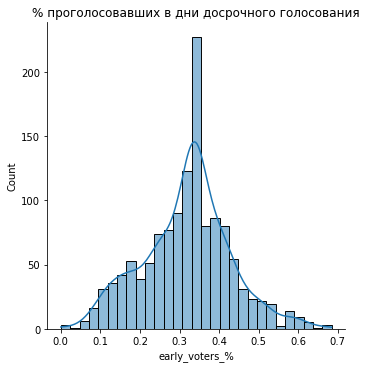

In [49]:
sns.displot(votes["early_voters_%"], kde=True)
plt.title("% проголосовавших в дни досрочного голосования")

# votes['early_voters_%'].value_counts(bins=15)

### Не очень похоже на нормальное распределение 🤓

### График зависимости "Явка – Количество голосов за кандидата"

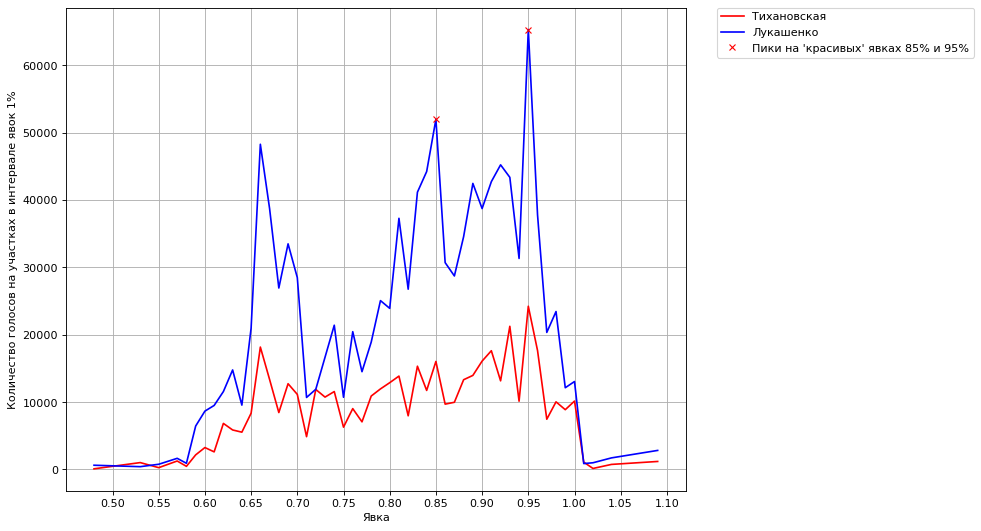

In [13]:
# округлим явку до процентов (0.85, вместо 0.84996)
votes["appearance_rounded"] = round(votes["appearance"], 2)

grouped = votes.groupby(['appearance_rounded']).sum()
draw_grouped_plot(grouped)

#grouped.sort_values('Lukashenko', ascending=False).head()

###  Хаос и никаких закономерностей, а пилы – свидетельство фальсификаций. И видно, что лука "взял" много голосов на участках с красивыми 95%ми и 85%ми явками

### Распределение последних цифр 6 граф протоколов (2418 чисел)
И неестественный выброс на единице 1️⃣

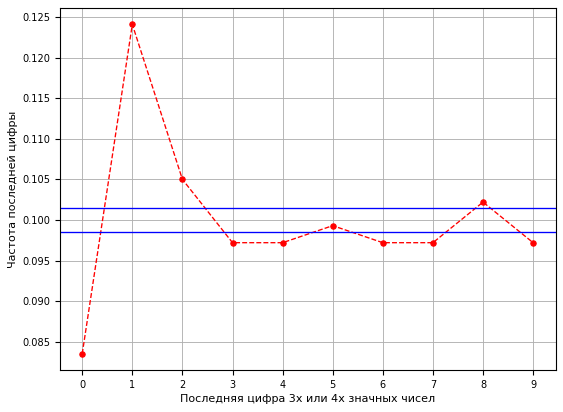

In [29]:
last_number_distribution(votes)

### Регионы с наибольшим количеством побед у Светланы
Всего есть 195 протоколов с победой Светланы

In [53]:
sveta_win_df = votes[votes["Tsikhanouskaya"] > votes["Lukashenko"]]
sveta_win_df.Region.value_counts()

Минская        62
Минск          53
Гродненская    29
Брестская      27
Гомельская     11
Витебская       9
Могилевская     4
Name: Region, dtype: int64

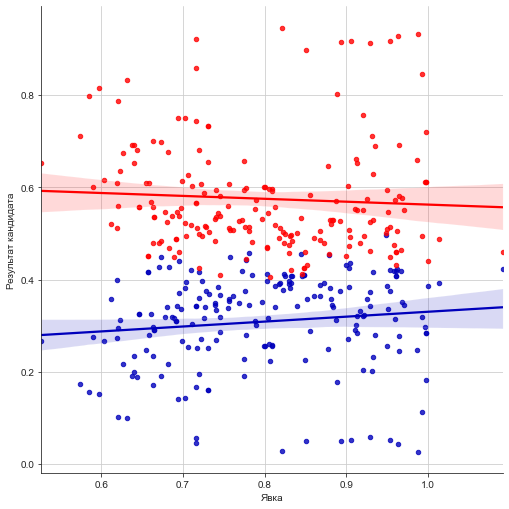

In [71]:
draw_regression_plot(sveta_win_df)

### Где у луки меньше 20%?

In [55]:
votes[['City', 'voted', 'Tsikhanouskaya', 'Lukashenko', 'svetlana_%', 'luka_%']][votes['luka_%'] < 0.2].sort_values(by='svetlana_%')

,City,voted,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1112,Минск,2061,1226,394,0.59486,0.19117
315,Жлобин,1773,1205,346,0.67964,0.19515
696,д. Боровляны,1538,1048,291,0.68140,0.18921
469,Лида,1192,825,228,0.69211,0.19128
743,п. Сухорукие,679,470,135,0.69219,0.19882
709,аг. Лесной,1231,860,235,0.69862,0.19090
711,аг. Лесной,1409,985,242,0.69908,0.17175
1156,Минск,1193,848,207,0.71081,0.17351
1041,Минск,2396,1725,438,0.71995,0.18280
713,аг. Лесной,1737,1274,279,0.73345,0.16062


In [10]:
def draw_dots(df):
    l = 10
    h = 8
    
    plt.figure(figsize=(l, h), dpi=80)

    plt.plot(df["appearance"], df["luka_%"], 'b.', label="Лукашенко")
    plt.plot(df["appearance"], df["svetlana_%"] , 'r.', label="Тихановская")

    plt.xlabel('Явка')
    plt.ylabel('Результат кандидата')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    #plt.xticks(np.arange(0.5, 1.1, 0.05))
    plt.grid()

    plt.show()

In [12]:
def draw_grouped_plot(grouped):
    plt.figure(figsize=(10, 8), dpi=80)

    plt.plot(grouped['Tsikhanouskaya'], 'r', label="Тихановская")
    plt.plot(grouped['Lukashenko'], 'b', label="Лукашенко")
    
    plt.plot(0.95, 65277, 'rx', label="Пики на 'красивых' явках 85% и 95%")
    plt.plot(0.85, 51959, 'rx')

    plt.xlabel('Явка')
    plt.ylabel('Количество голосов на участках в интервале явок 1%')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(np.arange(0.5, 1.1, 0.05))
    plt.grid()

    plt.show()

In [22]:
def draw_regions(dfs, labels):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    plt.setp(axs, xticks=np.arange(0.4, 1.1, 0.05))
    plt.sca(axs[0, 0])
    
    for i, df in enumerate(dfs):
        row = i // 3
        col = i % 3
        
        axs[row, col].plot(df["appearance"], df["svetlana_%"] , 'r.', label="Тихановская")
        axs[row, col].plot(df["appearance"], df["luka_%"], 'b.', label="Лукашенко")
        axs[row, col].set_title(labels[i])
        axs[row, col].grid()
        
        if labels[i].startswith('Минск'):
            plt.xticks(np.arange(0.4, 1.1, 0.1))
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    for ax in axs.flat:
        ax.set(xlabel='Явка', ylabel='Результат кандидата')

In [27]:
def last_number_distribution(df):
    columns = ['Dmitriev', 'Konopackaya', 'Lukashenko', 'Tsikhanouskaya', 'Cherechen']
    m = {}
    hist = []

    for column in columns:
        for n in df[column].values:
            if n/100 >= 1:
                x = int(n%10)
                m[x] = m.get(x, 0) + 1
                hist.append(x)

    summa = sum(m.values())

    m.update((x, round(y/summa, 4)) for x, y in m.items())
    m = sorted(m.items())
    x, y = zip(*m) # unpack a list of pairs into two tuples


    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y, 'r', linestyle='--', marker='o')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel('Последняя цифра 3х или 4х значных чисел')
    plt.ylabel('Частота последней цифры')

    plt.grid()
    plt.axhline(y=0.0985, color='b', linestyle='-')
    plt.axhline(y=0.1015, color='b', linestyle='-')
    plt.show()

In [16]:
def draw_regressions_plots(df):
    svet_df = df[['appearance', 'svetlana_%', 'Region', 'City']]
    svet_df = svet_df.rename({'svetlana_%': 'Результат кандидата'}, axis=1) 
    svet_df['is_svetlana'] = 1

    luka_df = df[['appearance', 'luka_%', 'Region', 'City']]
    luka_df = luka_df.rename({'luka_%': 'Результат кандидата'}, axis=1) 
    luka_df['is_svetlana'] = 0

    data = pd.concat([svet_df, luka_df]).reset_index(drop=True)
    
    data1 = data[((data['City'] != 'Минск') & (data['Region'] == 'Минская'))
                 | ((data['City'] != 'Брест') & (data['Region'] == 'Брестская')) 
                 | ((data['City'] != 'Витебск') & (data['Region'] == 'Витебская'))]
    data2 = data[((data['City'] != 'Гомель') & (data['Region'] == 'Гомельская'))
                 | ((data['City'] != 'Гродно') & (data['Region'] == 'Гродненская'))
                 | ((data['City'] != 'Могилев') & (data['Region'] == 'Могилевская'))]
    
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})  

    fig1 = sns.lmplot(x="appearance", y="Результат кандидата",
                   hue="is_svetlana", col='Region', data=data1, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20}, col_wrap=3)
    fig1.set(xlabel='Явка', ylabel='Результат кандидата')
    
    fig2 = sns.lmplot(x="appearance", y="Результат кандидата",
                   hue="is_svetlana", col='Region', data=data2, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20})
    fig2.set(xlabel='Явка', ylabel='Результат кандидата')
    
    
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":10,"axes.labelsize":10})  

In [31]:
def draw_regression_plot(df):
    svet_df = df[['appearance', 'svetlana_%', 'Region', 'City']]
    svet_df = svet_df.rename({'svetlana_%': 'Percentage of votes'}, axis=1) 
    svet_df['is_svetlana'] = 1

    luka_df = df[['appearance', 'luka_%', 'Region', 'City']]
    luka_df = luka_df.rename({'luka_%': 'Percentage of votes'}, axis=1) 
    luka_df['is_svetlana'] = 0

    data = pd.concat([svet_df, luka_df]).reset_index(drop=True)

    sns.set_style("ticks",{'axes.grid' : True})
    sns.lmplot(x="appearance", y="Percentage of votes",
                   hue="is_svetlana", data=data, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20})
    plt.xlabel('Явка')
    plt.ylabel('Результат кандидата')

### «Использованная литература»

Анализ проведен по следам видео Савватеева "Разбор выборов с Сергеем Шпилькиным"
- Ссылка на видео: https://www.youtube.com/watch?v=AbAPzs3P2Yo&t=1s
- Материалы в видео: https://disk.yandex.ru/i/bgGIGT4iWkL0Hg
- Доклад об электронном голосовании в Москве: https://drive.google.com/file/d/1L9U2ssdjw_nRJMjBIzebhPDppfoWZgmJ/view

### Приложение (aka bonus track)

Джерриме́ндеринг — произвольная демаркация избирательных округов с целью искусственного изменения соотношения политических сил в них и, как следствие, в целом на территории проведения выборов. https://ru.wikipedia.org/wiki/Джерримендеринг.

Иллюстрация возможностей разделения на электоральные округа: хотя во всех случаях в выборах участвуют 36 зелёных и 28 фиолетовых избирателей, число доставшихся кандидатам округов может равняться как 3:1 и 4:0 (слева), так и 2:2 и даже 1:3 (справа) в зависимости от выбора разделения.

<img src="https://imgur.com/O6wES9M.jpg" style="width: 500px;"/>